# Showcase of the main auxiliary instruments, that may assist EPDE usage

This notebook presents ...

In [1]:
import numpy as np
import os
import sys
from typing import Union, Callable

import matplotlib.pyplot as plt
import matplotlib as mpl

ADD SOME LINK TO ARTICLE ON EPDE PRINCIPLES

In [2]:
import sys
sys.path.append('..')
import helpers

import epde

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['text.usetex'] = True

SMALL_SIZE = 12
mpl.rc('font', size=SMALL_SIZE)
mpl.rc('axes', titlesize=SMALL_SIZE)

In [3]:
def get_dummy_search_obj():
    C = 1.3
    t = np.linspace(0, 4*np.pi, 200)
    x = np.sin(t) + C * np.cos(t)
    x_dot = np.cos(t) - C * np.sin(t)

    max_axis_idx = x.ndim - 1

    bnd = 20
    n_epochs = 60
    popsize = 8

    epde_search_obj = epde.EpdeSearch(multiobjective_mode = True, boundary = bnd, 
                                      coordinate_tensors = [t,], 
                                      verbose_params = {'show_iter_idx' : False}) # False for brevity

    trig_tokens = epde.TrigonometricTokens(freq = (0.95, 1.05), dimensionality=max_axis_idx)
    grid_tokens = epde.GridTokens(['x_0',], dimensionality = max_axis_idx)

    epde_search_obj.set_moeadd_params(population_size = popsize, training_epochs=n_epochs)

    factors_max_number = {'factors_num' : [1, 2], 'probas' : [0.65, 0.35]} # 1 factor with P = 0.65, 2 with P = 0.35

    epde_search_obj.fit(data=[x,], variable_names=['u',], max_deriv_order=(1,), derivs=[x_dot.reshape((-1, 1)),],
                        equation_terms_max_number=4, data_fun_pow = 1,
                        additional_tokens=[trig_tokens, grid_tokens],
                        equation_factors_max_number=factors_max_number,
                        eq_sparsity_interval=(1e-6, 1e-2))
    return epde_search_obj

In [4]:
epde_search_obj = get_dummy_search_obj()

setting builder with <epde.optimizers.builder.StrategyBuilder object at 0x743946327c10>
setting builder with <epde.optimizers.builder.StrategyBuilder object at 0x743946327c10>
trig_token_params: VALUES = (0, 0)
Deriv orders after definition [[0]]
initial_shape (200,) derivs_tensor.shape (200, 1)
Size of linked labels is 2
The cardinality of defined token pool is [1 1 2 1]
Among them, the pool contains [1 1 1]
self.vars_demand_equation {'u'}
Creating new equation, sparsity value [0.00222918]
New solution accepted, confirmed 1/8 solutions.
Creating new equation, sparsity value [7.07651053e-06]
New solution accepted, confirmed 2/8 solutions.
Creating new equation, sparsity value [0.0015405]
New solution accepted, confirmed 3/8 solutions.
Creating new equation, sparsity value [0.00013073]
New solution accepted, confirmed 4/8 solutions.
Creating new equation, sparsity value [2.3796575e-05]
New solution accepted, confirmed 5/8 solutions.
Creating new equation, sparsity value [0.00411273]
New

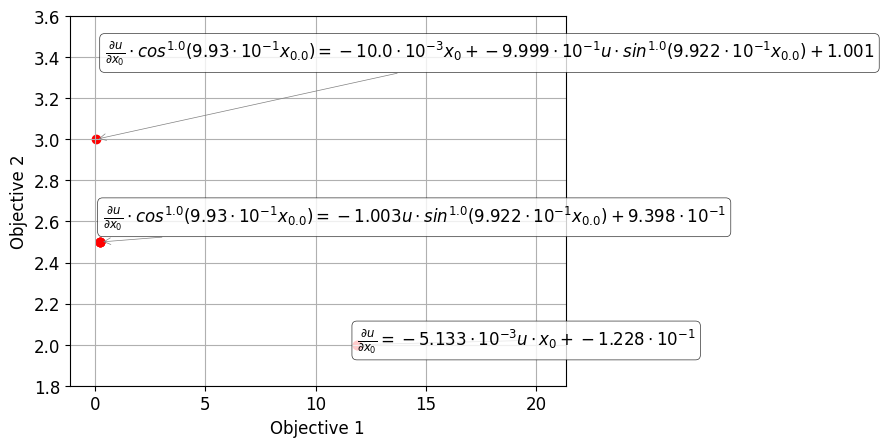

In [5]:
epde_search_obj.visualize_solutions()

In [6]:
epde_search_obj.fit(optimizer = epde_search_obj.optimizer, pool = epde_search_obj.pool,
                    population = epde_search_obj.optimizer.pareto_levels)

The optimization has been conducted.


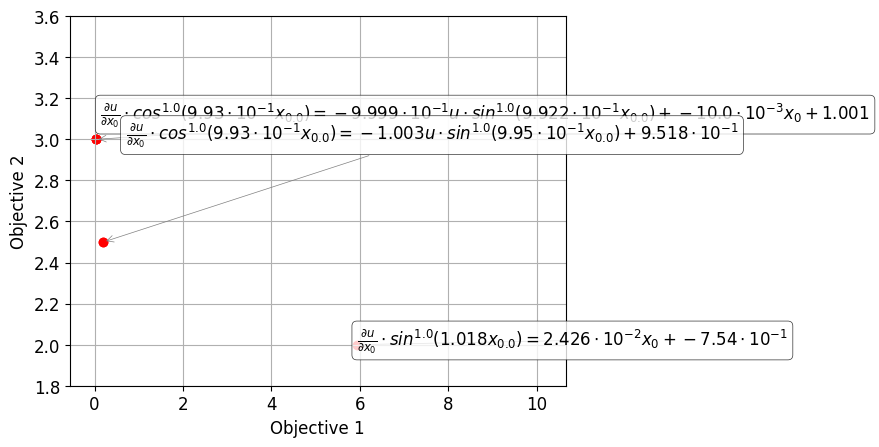

In [7]:
epde_search_obj.visualize_solutions()

In [8]:
levels = epde_search_obj.optimizer.pareto_levels

In [9]:
path_dir = os.path.join(os.path.dirname(os.path.abspath('')), 'examples', 'saved_objs')
print(path_dir)

/home/mikemaslyaev/Documents/EPDE_merge/examples/saved_objs


Let's save an equation, corresponding pool and cache for further use in pickle forms. 

In [10]:
import epde.loader as Loader

path_dir = os.path.join(os.path.dirname(os.path.abspath('')), 'examples', 'saved_objs')

loader = Loader.EPDELoader()
loader.save(obj=levels, filename=os.path.join(path_dir, 'dummy_levels.pickle')) # Pickle-saving an equation
loader.save(obj = epde_search_obj.pool, filename=os.path.join(path_dir, 'dummy_pool.pickle')) # Pickle-saving the pool

In [11]:
assister = Loader.LoaderAssistant()
assister.pool_preset()

{'TFPool': {}}

In [12]:
import epde.loader as Loader

path_dir = os.path.join(os.path.dirname(os.path.abspath('')), 'examples', 'saved_objs')

loaded_pool = loader.load(os.path.join(path_dir, 'dummy_pool.pickle'), **assister.pool_preset())
levels_loaded = loader.load(os.path.join(path_dir, 'dummy_levels.pickle'), 
                            **assister.pareto_levels_preset(pool = loaded_pool))

# Edit manual loading of miscelanious properties of the SoEq
# Try to remove unnecessary attributes of epde.structure.main_structures.Equation & similar classes
# TODO: define manual loading logic for evaluator inside 

We can print the obtained equations from the Pareto frontier

In [13]:
levels_loaded.levels[0][0].text_form

"0.0 * u{power: 1.0} * sin{power: 1.0, freq: 1.0222582809668073, dim: 0.0} + 0.0 * du/dx0{power: 1.0} + 0.024262768781180798 * x_0{power: 1.0, dim: 0.0} + -0.7539774069399351 = du/dx0{power: 1.0} * sin{power: 1.0, freq: 1.0184771382220263, dim: 0.0}\n{'terms_number': {'optimizable': False, 'value': 4}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.65, 0.35]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0.007441307301911709}}"

In [14]:
epde_search_obj.fit(optimizer = epde_search_obj.optimizer, pool = loaded_pool,
                    population = levels_loaded)

The optimization has been conducted.


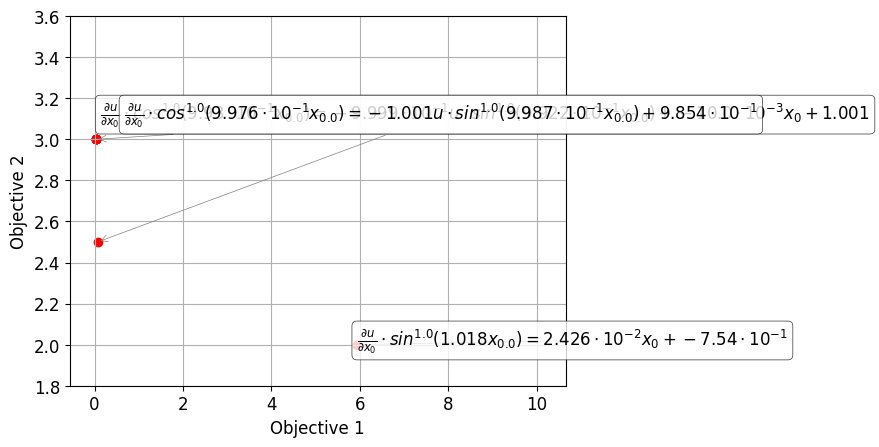

In [15]:
epde_search_obj.visualize_solutions()